In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-metro-txt/stop_times.txt
/kaggle/input/delhi-metro-txt/trips.txt
/kaggle/input/delhi-metro-txt/agency.txt
/kaggle/input/delhi-metro-txt/shapes.txt
/kaggle/input/delhi-metro-txt/stops.txt
/kaggle/input/delhi-metro-txt/calendar.txt
/kaggle/input/delhi-metro-txt/routes.txt
/kaggle/input/delhi-metro-dataset/Delhi metro.csv


# ****Exploratory Analysis of Delhi Metro****

In [2]:
import pandas as pd
import plotly.express as px
import IPython.display as dsp

In [3]:
dsp.Image(url='https://images.timesproperty.com/blog/4921/Delhi_metro1.jpg')

# **Import Data**

In [4]:
import pandas as pd

metro_data = pd.read_csv("/kaggle/input/delhi-metro-dataset/Delhi metro.csv") 

In [5]:
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

print(metro_data.head())

   ID (Station ID)                 Station Names  \
0                1  Shaheed Sthal(First Station)   
1                2                  Hindon River   
2                3                       Arthala   
3                4                   Mohan Nagar   
4                5                    Shyam park   

   Dist. From First Station(km) Metro Line Opened(Year)    Layout   Latitude  \
0                           0.0   Red line   08-03-2019  Elevated  28.670611   
1                           1.0   Red line   08-03-2019  Elevated  28.878965   
2                           2.5   Red line   08-03-2019  Elevated  28.676999   
3                           3.2   Red line   08-03-2019  Elevated  28.606319   
4                           4.5   Red line   08-03-2019  Elevated  28.698807   

   Longitude  
0  77.415582  
1  77.415483  
2  77.391892  
3  77.106082  
4  28.698807  


In [6]:
# checking data types
data_types = metro_data.dtypes

data_types

ID (Station ID)                   int64
Station Names                    object
Dist. From First Station(km)    float64
Metro Line                       object
Opened(Year)                     object
Layout                           object
Latitude                        float64
Longitude                       float64
dtype: object

In [7]:
metro_data.head()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807


In [8]:
metro_data.tail()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
280,2,Shivaji Stadium,1.9,Orange line,23-02-2011,Underground,28.62901,77.21190
281,3,Dhaula Kuan [Conn: Pink],8.3,Orange line,15-08-2011,Elevated,28.59178,77.16155
282,4,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.54881,77.12092
283,5,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.55693,77.08669
284,6,Dwarka Sector 21 [Conn: Blue],20.8,Orange line,23-02-2011,Underground,28.55226,77.05828


In [9]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID (Station ID)               285 non-null    int64  
 1   Station Names                 285 non-null    object 
 2   Dist. From First Station(km)  285 non-null    float64
 3   Metro Line                    285 non-null    object 
 4   Opened(Year)                  285 non-null    object 
 5   Layout                        285 non-null    object 
 6   Latitude                      285 non-null    float64
 7   Longitude                     285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [10]:
metro_data.describe()

,ID (Station ID),Dist. From First Station(km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,16.214035,19.218947,28.595428,77.029315
std,11.461808,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,6.000000,7.300000,28.545828,77.107130
50%,14.000000,17.400000,28.613453,77.207220
75%,24.000000,28.800000,28.666360,77.281165
max,49.000000,52.700000,28.878965,77.554479


In [11]:
metro_data.columns

Index(['ID (Station ID)', 'Station Names', 'Dist. From First Station(km)',
       'Metro Line', 'Opened(Year)', 'Layout', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
metro_data.shape

(285, 8)

In [13]:
metro_data.isnull().sum()

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

In [14]:
from seaborn import pairplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
metro_data.head()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807


In [16]:
metro_data['Metro Line'].unique()

array(['Red line', 'Yellow line', 'Blue line', 'Blue line branch',
       'Green line branch', 'Green line', 'Rapid Metro', 'Voilet line',
       'Magenta line', 'Pink line', 'Aqua line', 'Gray line',
       'Orange line'], dtype=object)

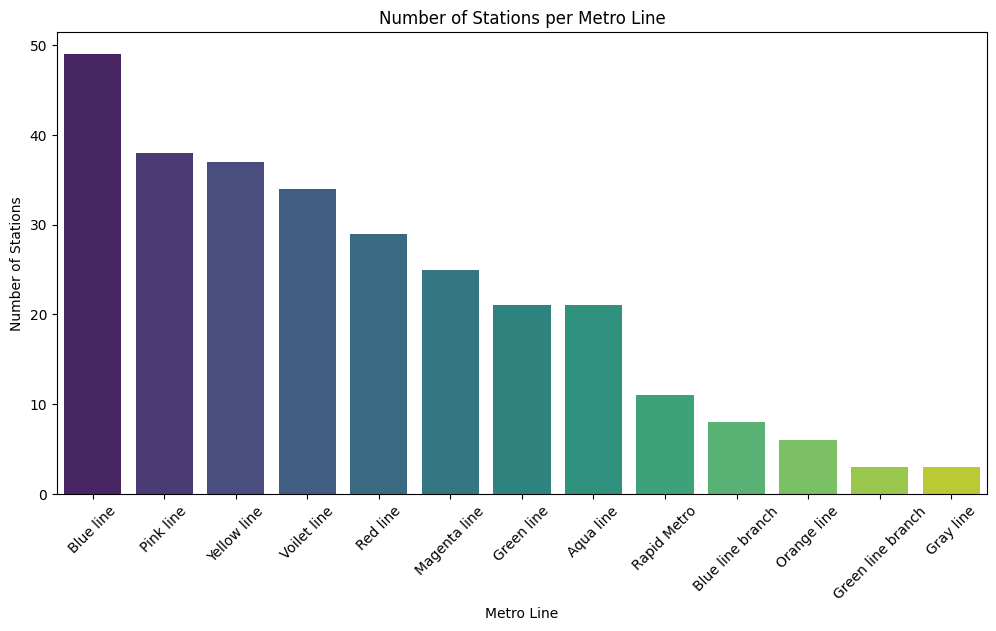

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of stations per line
stations_per_line = metro_data['Metro Line'].value_counts()

# Plotting the number of stations per metro line
plt.figure(figsize=(12, 6))
sns.barplot(x=stations_per_line.index, y=stations_per_line.values, palette="viridis")
plt.title('Number of Stations per Metro Line')
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Geospatial Analysis

In [18]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Metro Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Names']}",
        tooltip=f"{row['Station Names']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

# Converting Year Opened and Month Opened to seperate columns and format 

In [19]:
metro_data['Month Opened']=metro_data['Opened(Year)'].str.split('-').str[1]
metro_data['Year Opened']=metro_data['Opened(Year)'].str.split('-').str[2]
metro_data.head()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude,Month Opened,Year Opened
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582,03,2019
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483,03,2019
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892,03,2019
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082,03,2019
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807,03,2019


# Yearly Openings

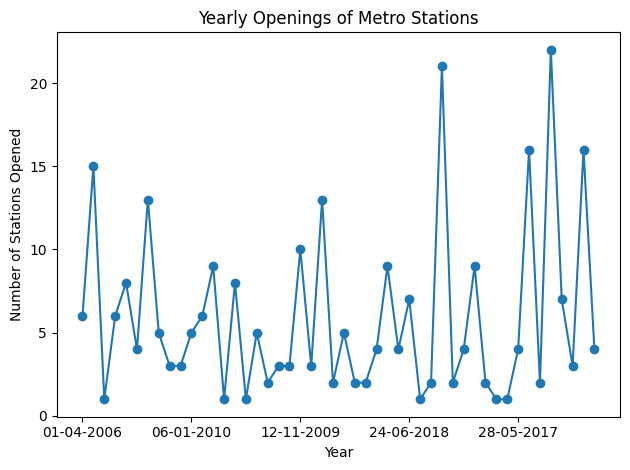

In [20]:
yearly_openings = metro_data.groupby('Opened(Year)').size()
yearly_openings.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')
plt.title('Yearly Openings of Metro Stations')
plt.tight_layout()
plt.show()

# Monthly Openings of metro stations by metro line

In [21]:
import plotly.express as px

metro_data_line_mont = metro_data.groupby(['Metro Line', 'Month Opened']).agg({'Metro Line':'count'}).rename(columns={'Metro Line':'Count_Month_Opened'}).reset_index()

# Plot the results
fig = px.bar(metro_data_line_mont, x='Month Opened', y='Count_Month_Opened', title='Count Of Metro Station On Each Line By Month Opened', color='Metro Line')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [22]:
layout_counts = metro_data['Metro Line'].value_counts()

# creating the bar plot using Plotly
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x': 'Metro Line', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

# updating layout for better presentation
fig.update_layout(xaxis_title="Metro Line",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

